# Marketing Analytics: Customer Segmentation 
<a id = "table-of-contents"></a>
# Table of Contents
- [Introduction](#intro)
- [Data](#data)
- [Data Preparation and Cleaning](#preparation)
- [Data Exploration](#exploration)
- [Feature Engineering](#feature_eng)
- [K-Means Clustering](#kmeans)
- [Exploration of Clusters](#exp_clust)
- [Results](#results)
- [Recommendations](#recommendations)

<a id = "intro"></a>
# Introduction
Customer segmentation is a powerful marketing technique that involves dividing a customer base into distinct segments based on shared characteristics, behaviours, or demographics. The primary purpose of customer segmentation is to better understand and serve customers in a more personalized and targeted way. Marketing segmentation helps to understand customer needs better  and reach the right customer with right messaging.  
Exploratory Data Analysis (EDA) is a necessary preliminary step before using a segmentation algorithm.

<a id = "data"></a>
# Data
The data contains 2,205 observations and 39 columns. The dataset description on the card does not match the actual columns in the dataset. The below list contains actual columns from the dataset and the assumed descriptions from the column's names. 

| Feature | Description | Comment |
|---------|-------------|---------|
| **AcceptedCmp1** | 1 if customer accepted the offer in the 1st campaign, 0 otherwise | |
| **AcceptedCmp2** | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise | |
| **AcceptedCmp3** | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise | |
| **AcceptedCmp4** | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  | |
| **AcceptedCmp5** | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  | |
| **AcceptedCmpOverall** | overall number of accepted campaigns |This column was added from the list of actual columns|
| **Response** | 1 if customer accepted the offer in the last campaign, 0 otherwise  | |
| **Complain** | 1 if customer complained in the last 2 years  | |
| **DtCustomer** | date of customer’s enrolment with the company |There is no such column in the dataset|
| **Customer_Days** | number of days since registration as a customer | |
| **Education** | customer’s level of education |There is no such column in the actual dataset|
| **education_2n Cycle** | customer has secondary education | This column was added from the list of actual columns|
| **education_Basic** | customer has basic education | This column was added from the list of actual columns|
| **education_Graduation** |Customer has a bachelor degree | This column was added from the list of actual columns|
| **education_Master** | Customer has a masters degree|This column was added from the list of actual columns|
| **education_PhD** | Customer has a PhD | This column was added from the list of actual columns |
| **Marital** | customer’s marital status. |There is no such column in the actual dataset |
| **marital_Divorced** | 1 if customer is divorced, 0 otherwise. | This column was added from the list of actual columns|
| **marital_Married** | 1 if customer is married, 0 otherwise.| This column was added from the list of actual columns|
| **marital_Single** | 1 if customer is single, 0 otherwise. |This column was added from the list of actual columns|
| **marital_Together** | 1 if customer is in relationship, 0 otherwise.| This column was added from the list of actual columns|
| **marital_Widow** | 1 if customer is a widow / widower, 0 otherwise  | |
| **Kidhome** | number of small children in customer’s household | |
| **Teenhome** | number of teenagers in customer’s household | |
| **Income** | customer’s yearly household income | |
| **MntFishProducts** | amount spent on fish products in the last 2 years | |
| **MntMeatProducts** | amount spent on meat products in the last 2 years | |
| **MntFruits** | amount spent on fruits products in the last 2 years | |
| **MntSweetProducts** | amount spent on sweet products in the last 2 years | |
| **MntWines** | amount spent on wine products in the last 2 years | |
| **MntGoldProds** | amount spent on gold products in the last 2 years | |
| **NumDealsPurchases** | number of purchases made with discount | |
| **NumCatalogPurchases** | number of purchases made using catalogue | |
| **NumStorePurchases** | number of purchases made directly in stores | |
| **NumWebPurchases** | number of purchases made through company’s web site | |
| **NumWebVisitsMonth** | number of visits to company’s web site in the last month | |
| **Recency** | number of days since the last purchase | |
| **Z_CostContact** | | This column was added from the list of actual columns|
| **Z_Revenue** | | This column was added from the list of actual columns|
| **Age** | Age of customer|  This column was added from the list of actual columns|
| **MntTotal** | Total amount spent on all the products| This column was added from the list of actual columns |
| **MntRegularProds** | | This column was added from the list of actual columns|


<a id = "preparation"></a>
# Data Preparation and Cleaning
In this section:
- Reviewing data columns and comparing them to the dataset description
- Looking for missing values
- Checking column types
- Assessing unique values


In [3]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [4]:
#Reading the data
data = pd.read_csv('ifood_df.csv')

#Taking a look at the top 5 rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


There is some data in the dataframe. Let's dig into the data.

## Reviewing data columns and comparing them to the dataset description


Retrieving the list of actual columns to compare with the column's description in the dictionary.png. The list of columns has been updated and the data description contains actual columns.

In [5]:
data.columns

Index(['Income   ', 'Kidhome ', 'Teenhome ', 'Recency ', 'MntWines ',
       'MntFruits ', 'MntMeatProducts ', 'MntFishProducts ',
       'MntSweetProducts ', 'MntGoldProds ', 'NumDealsPurchases ',
       'NumWebPurchases ', 'NumCatalogPurchases ', 'NumStorePurchases ',
       'NumWebVisitsMonth ', 'AcceptedCmp3 ', 'AcceptedCmp4 ', 'AcceptedCmp5 ',
       'AcceptedCmp1 ', 'AcceptedCmp2 ', 'Complain ', 'Z_CostContact ',
       'Z_Revenue ', 'Response ', 'Age ', 'Customer_Days ',
       'marital_Divorced ', 'marital_Married ', 'marital_Single ',
       'marital_Together ', 'marital_Widow ', 'education_2n Cycle ',
       'education_Basic ', 'education_Graduation ', 'education_Master ',
       'education_PhD ', 'MntTotal ', 'MntRegularProds ',
       'AcceptedCmpOverall'],
      dtype='object')

## Looking for missing values
Surprisingly, there is no missing values in the data and there are 2,205 observations in the data frame.

In [6]:
data.isna().sum()

Income                   0
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Customer_Days            0
marital_Divorced         0
marital_Married          0
marital_Single           0
marital_Together         0
marital_Widow            0
education_2n Cycle       0
education_Basic          0
education_Graduation     0
education_Master         0
education_PhD            0
MntTotal                 0
M

## Checking column types
All column types look good. There is no need to change any data types.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2205 non-null   float64
 1   Kidhome                2205 non-null   int64  
 2   Teenhome               2205 non-null   int64  
 3   Recency                2205 non-null   int64  
 4   MntWines               2205 non-null   int64  
 5   MntFruits              2205 non-null   int64  
 6   MntMeatProducts        2205 non-null   int64  
 7   MntFishProducts        2205 non-null   int64  
 8   MntSweetProducts       2205 non-null   int64  
 9   MntGoldProds           2205 non-null   int64  
 10  NumDealsPurchases      2205 non-null   int64  
 11  NumWebPurchases        2205 non-null   int64  
 12  NumCatalogPurchases    2205 non-null   int64  
 13  NumStorePurchases      2205 non-null   int64  
 14  NumWebVisitsMonth      2205 non-null   int64  
 15  Acce

## Assessing unique values
Let's check the unique values in each column. If a column has the same values then we cannot use this column in our analysis and can remove it from the data frame. 

In [8]:
data.nunique()

Income                   1963
Kidhome                     3
Teenhome                    3
Recency                   100
MntWines                  775
MntFruits                 158
MntMeatProducts           551
MntFishProducts           182
MntSweetProducts          176
MntGoldProds              212
NumDealsPurchases          15
NumWebPurchases            15
NumCatalogPurchases        13
NumStorePurchases          14
NumWebVisitsMonth          16
AcceptedCmp3                2
AcceptedCmp4                2
AcceptedCmp5                2
AcceptedCmp1                2
AcceptedCmp2                2
Complain                    2
Z_CostContact               1
Z_Revenue                   1
Response                    2
Age                        56
Customer_Days             662
marital_Divorced            2
marital_Married             2
marital_Single              2
marital_Together            2
marital_Widow               2
education_2n Cycle          2
education_Basic             2
education_

Columns Z_CostContact and Z_Revenue have all the same values. These columns will not help us to understand our customers better. We can drop these columns from the data frame.

In [10]:
data.drop(columns=['Z_CostContact ','Z_Revenue '],inplace=True)

<a id="exploration"></a>    
# Data Exploration
In this section:
- Box plot for the total amount spent on all products (MntTotal)
- Outliers
- Box plot and histogram for income
- Histogram for age
- Correlation matrix
- Point-Biserial correlations for binary variables

## Box plot for the total amount spent on all products (MntTotal)
Our analysis will be focused on total amount spent on all products (MntTotal). Boxplot will help us to find outliers if any.

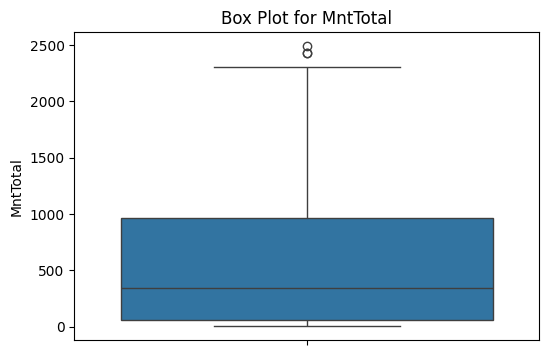

In [12]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal ')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

## Outliers
The box plot spotted a few outliers in the MntTotal. Let's take a closer look at the outliers. 

In [15]:
Q1 = data['MntTotal '].quantile(0.25)
Q3 = data['MntTotal '].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal '] < lower_bound) | (data['MntTotal '] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


### Outliers removal

In [17]:
data = data[(data['MntTotal '] > lower_bound) & (data['MntTotal '] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


## Box plot and histogram for income

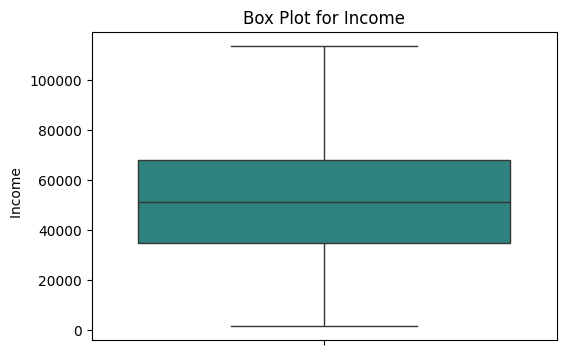

In [22]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='Income   ', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income   ')
plt.show()

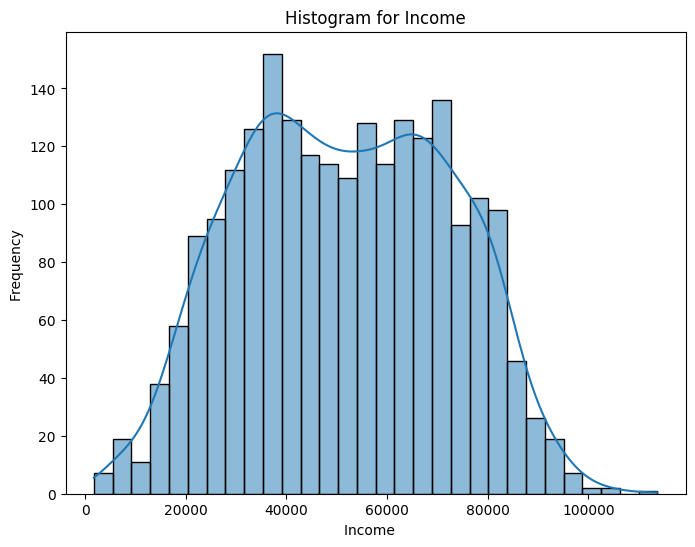

In [24]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Income   ', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income   ')
plt.ylabel('Frequency ')
plt.show()

Income distribution is close to normal distribution with no outliers.

## Histogram for age

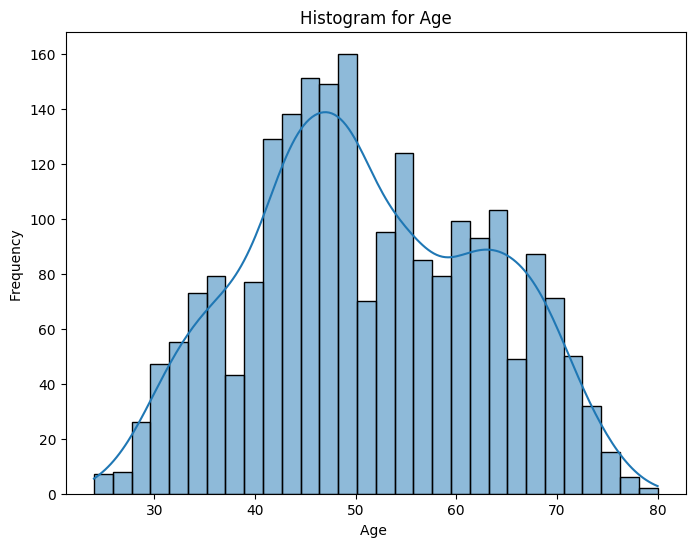

In [26]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age ', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age ')
plt.ylabel('Frequency ')
plt.show()

In [28]:
print("Skewness: %f" % data['Age '].skew())
print("Kurtosis: %f" % data['Age '].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


The age distribution looks approximately symmetrical and the left and right sides of distribution are roughly equal. Skewness of 0.09 (close to zero) supports the visual observation of the distribution.
Kurtosis of -0.8 suggests that the distribution is close to normal with lighter tails and less peaked than a normal distribution. 

## Correlation matrix

There are many columns in the data. The correlation matrix will be very crowded if we use all columns of the data frame. We will group the columns and explore correlation between columns in each group and the column 'MntTotal'. We will focus on the column 'MntTotal' to understand how we can segment the customers who buy the most in overall. We can run similar analysis for every type of product.

In [32]:
cols_demographics = ['Income   ','Age ']
cols_children = ['Kidhome ', 'Teenhome ']
cols_marital = ['marital_Divorced ', 'marital_Married ','marital_Single ', 'marital_Together ', 'marital_Widow ']
cols_mnt = ['MntTotal ', 'MntRegularProds ','MntWines ', 'MntFruits ', 'MntMeatProducts ', 'MntFishProducts ', 'MntSweetProducts ', 'MntGoldProds ']
cols_communication = ['Complain ', 'Response ', 'Customer_Days ']
cols_campaigns = ['AcceptedCmpOverall ', 'AcceptedCmp1 ', 'AcceptedCmp2 ', 'AcceptedCmp3 ', 'AcceptedCmp4 ', 'AcceptedCmp5 ']
cols_source_of_purchase = ['NumDealsPurchases ', 'NumWebPurchases ','NumCatalogPurchases ', 'NumStorePurchases ', 'NumWebVisitsMonth ']
cols_education = ['education_2n Cycle ', 'education_Basic ', 'education_Graduation ', 'education_Master ', 'education_PhD ']

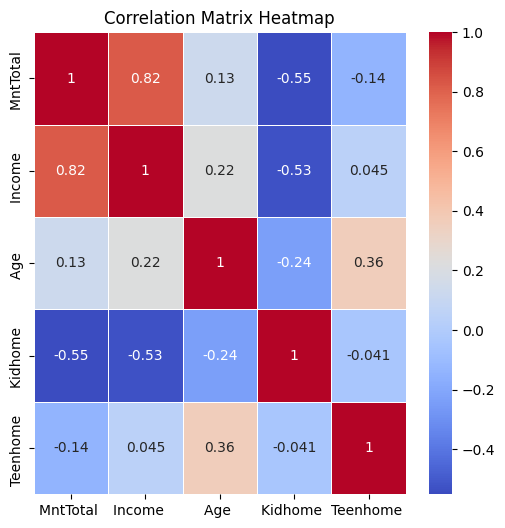

In [34]:
corr_matrix = data[['MntTotal ']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

MntTotal has strong positive correlation with income and intermediate negative correlation with Kidhome. Income feature has nearly the same negative correlation with Kidhome and MntTotal.

## Point-Biserial correlations for binary variables
Pearson correlation measures the strength and direction of a linear relationship between two continuous variables. We used Pearson correlation for MntTotal, Age and Income. When we try to understand the relationship between a continuous variable MntTotal and binary variables like marital status then we should use Point-Biserial Correlation
Point-Biserial Correlation is used to measure the strength and direction of the linear relationship between a binary variable and a continuous variable.

In [36]:
for col in cols_marital:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal '])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')    

0.0053: Point-Biserial Correlation for marital_Divorced  with p-value 0.8041
-0.0188: Point-Biserial Correlation for marital_Married  with p-value 0.3767
0.0011: Point-Biserial Correlation for marital_Single  with p-value 0.9571
0.0008: Point-Biserial Correlation for marital_Together  with p-value 0.9708
0.0370: Point-Biserial Correlation for marital_Widow  with p-value 0.0826


There is no strong Point-Biserial correlation between MntTotal and different marital statuses. Some feature engineering may be required during the modelling process.

In [38]:
for col in cols_education:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal '])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')    

-0.0593: Point-Biserial Correlation for education_2n Cycle  with p-value 0.0054
-0.1389: Point-Biserial Correlation for education_Basic  with p-value 0.0000
0.0159: Point-Biserial Correlation for education_Graduation  with p-value 0.4551
0.0004: Point-Biserial Correlation for education_Master  with p-value 0.9842
0.0737: Point-Biserial Correlation for education_PhD  with p-value 0.0005


There is no strong Point-Biserial correlation between MntTotal and various education levels.

<a id="feature_eng"></a>
# Feature Engineering
In this section:
- New feature: Marital
- New feature: In_relationship


## New feature: Marital
The data frame contains 5 columns to reflect marital status. We are going to create a new column 'marital' with values: Divorced, Married, Single, Together, Widow. This column will allow us to draw some additional plots. 

In [41]:
def get_marital_status(row):
    if row['marital_Divorced '] == 1:
        return 'Divorced'
    elif row['marital_Married '] == 1:
        return 'Married'
    elif row['marital_Single '] == 1:
        return 'Single'
    elif row['marital_Together '] == 1:
        return 'Together'
    elif row['marital_Widow '] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital '] = data.apply(get_marital_status, axis=1)


Text(0, 0.5, 'MntTotal ')

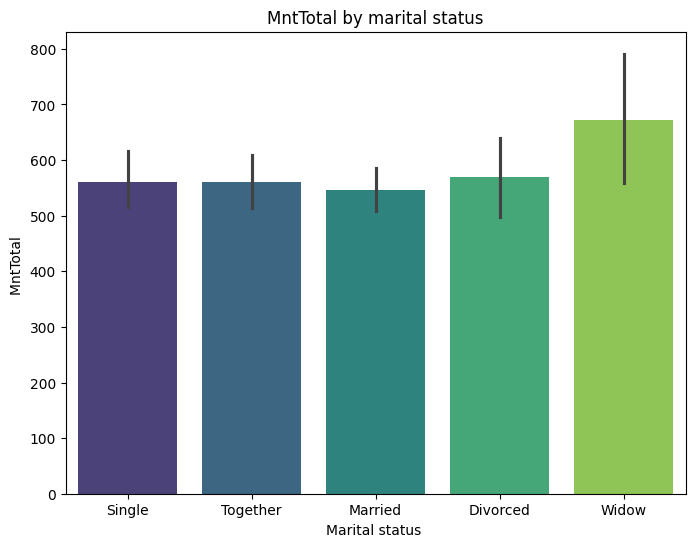

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital ', y='MntTotal ', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status ')
plt.ylabel('MntTotal ')

## New feature: In_relationship
There are 3 features that reflect if a person is single (Single, Divorced, Widow) and 2 features if a person is in relationship (Together, Married). We will add an additional feature 'In_relationship'. This feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.

In [46]:
def get_relationship(row):
    if row['marital_Married '] ==1:
        return 1
    elif row['marital_Together '] == 1:
        return 1
    else:
        return 0
data['In_relationship '] = data.apply(get_relationship, axis=1)
data.head()    


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


<a id="kmeans"></a>
# K-Means Clustering
K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets.

In this section:
- Standardising data
- Principal Component Analysis (PCA)
- Elbow method
- Silhouette score analysis



In [47]:
from sklearn.cluster import KMeans

## Standardising data
K-means clustering algorithm is based on the calculation of distances between data points to form clusters. When features have different scales, features with larger scales can disproportionately influence the distance calculation. There are various ways to standardise features, we will use <b> standard scaling </b>.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income   ', 'MntTotal ', 'In_relationship ']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


The mean value for all colums is almost zero and the standard deviation is almost 1. All the data points were replaced by their z-scores.

## Principal Component Analysis (PCA)
PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions) and create new features that capture the most variance of the data. 

In [50]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

## Elbow method
The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [51]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

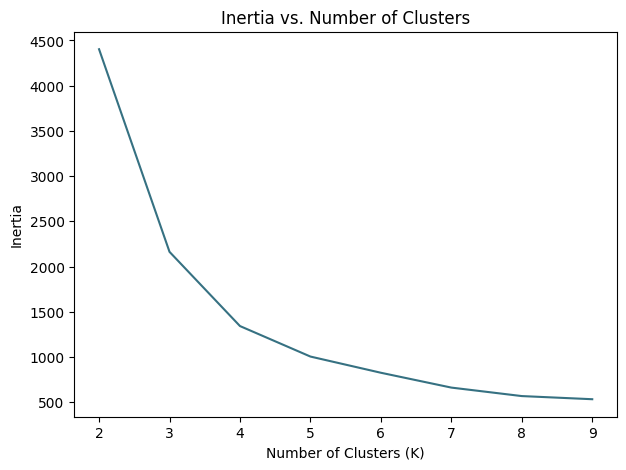

In [52]:

plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Elbow method suggests 4 or 5 clusters. Let's check silhouette score.

## Silhouette score analysis
Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

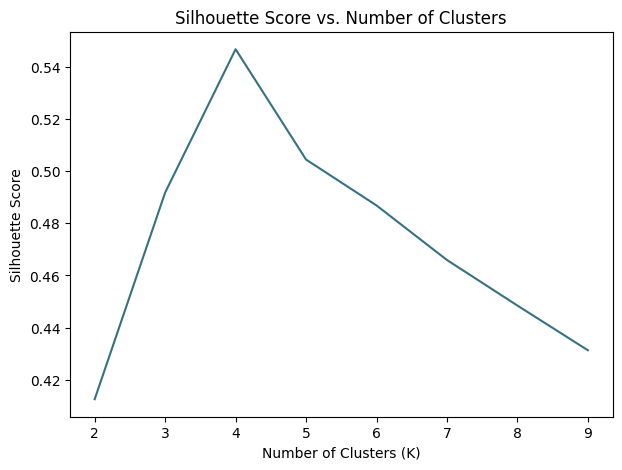

In [53]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest silhouette score is for 4 clusters.

In [54]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

<a id="exp_clust"></a>
# Exploration of Clusters
In this section:
- Visualisation of clusters
- Mean consumption of different product types by cluster
- Cluster sizes
- Income by cluster
- In_relationship feature by cluster



## Visualisation of clusters

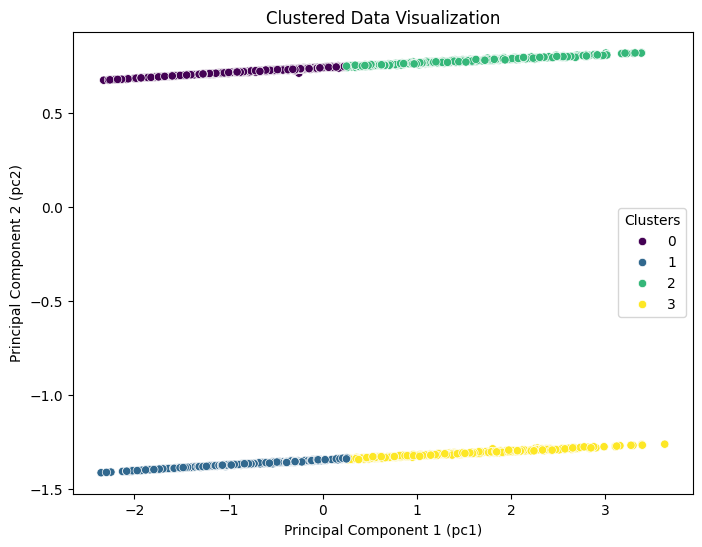

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [56]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,38027.656977,160.412791,1.0
1,37332.339956,150.761589,0.0
2,71914.598930,1153.197861,1.0
3,71946.155488,1159.612805,0.0


## Mean consumption of different product types by cluster

In [57]:
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,160.412791,135.405814,93.372093,7.689535,39.789535,11.547674,8.013953,25.006977
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1153.197861,1082.465241,625.964349,52.814617,343.479501,75.959002,54.980392,70.732620
3,3,1159.612805,1085.332317,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488


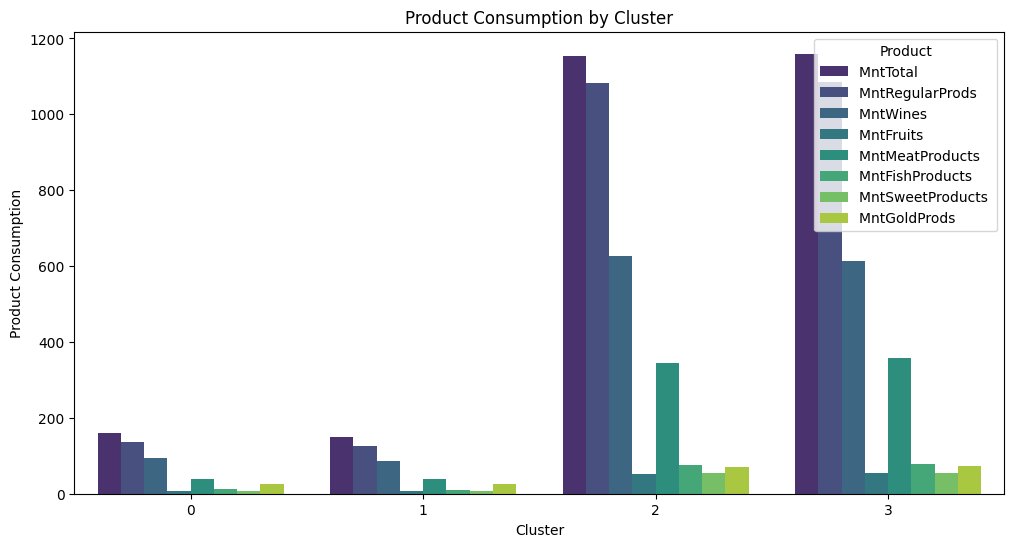

In [58]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

## Cluster sizes

Text(0, 0.5, 'MntTotal ')

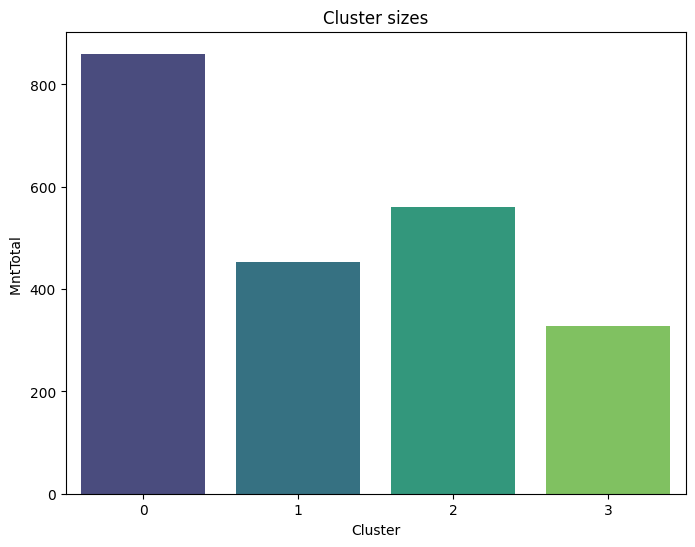

In [61]:
cluster_sizes = data.groupby('Cluster')[['MntTotal ']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal ', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal ')


In [63]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal '] / total_rows*100,0)
cluster_sizes.head()


,Cluster,MntTotal,Share%
0,0,860,39.0
1,1,453,21.0
2,2,561,25.0
3,3,328,15.0


## Income by cluster
### Box plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


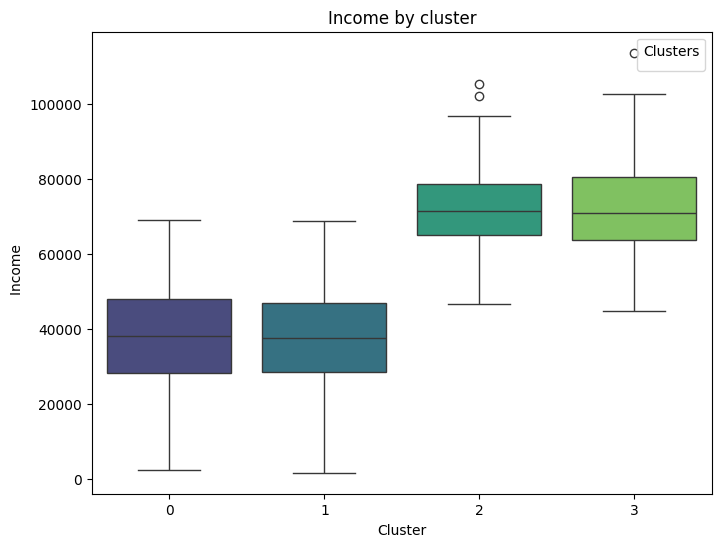

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income   ', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income   ')
plt.legend(title='Clusters')

### Scatter plot

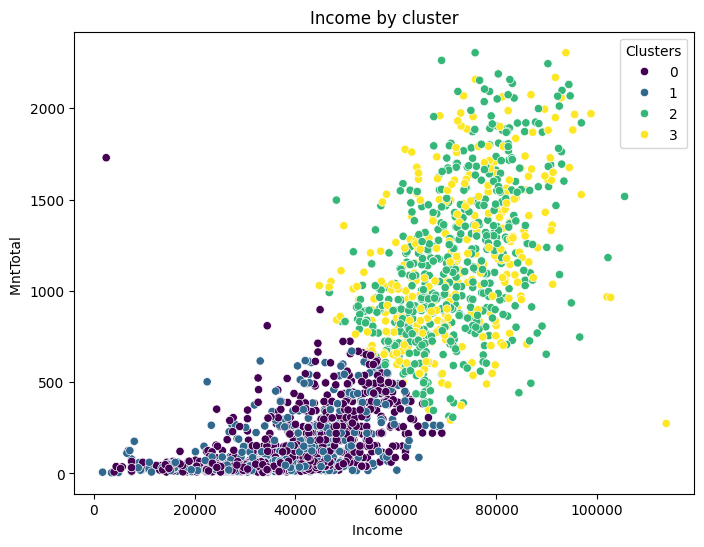

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income   ', y='MntTotal ', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income   ')
plt.ylabel('MntTotal ')
plt.legend(title='Clusters')

## In_relationship feature by cluster

Text(0, 0.5, 'In_relationship ')

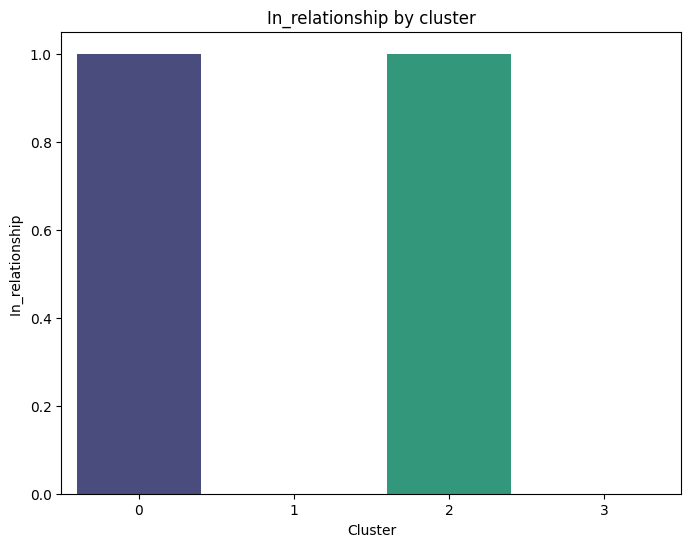

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship ', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship ')

<a id="results"></a>
# Results
This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' and 'In_relationship' features.

## Optimal number of clusters = 4
The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis revealed a peak silhouette score for k=4.

## Cluster Characteristics
### Cluster 0: High value customers in relationship (either married or together)
- This cluster represents 26% of the customer base
- These customers have high income and they are in a relationship

### Cluster 1: Low value single customers
- This cluster represents 21% of the customer base
- These customers have low income and they are single

### Cluster 2: High value single customers
- This cluster represents 15% of the customer base
- These customers have high income and they are single

### Cluster 3: Low value customers in relationship
- This cluster represents 39% of the customer base
- These customers have low income and they are in a relationship




<a id="recommendations"></a>
# Recommendations
Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences.

## Marketing Strategies for Each Cluster

### Cluster 0: High value customers in relationship (either married or together)
- Preliminary analysis showed that high income customers buy more wines and fruits. 
- A tailored campaign to promote high quality wines may bring good results. 
- This cluster contains customers in relationship, family-oriented promo-images should be quite effective for this audience.

### Cluster 1: Low value single customers
- Promos with discounts and coupons may bring good results for this targeted group.
- Loyalty program may stimulate these customers to purchase more often. 

### Cluster 2: High value single customers
- Similar to the Cluster 0, these customers buy a lot of wines and fruits.
- This cluster contains single customers. Promo images with friends, parties or single trips may be more efficient for single customers

### Cluster 3: Low value customers in relationship
- This cluster has the highest percentage of our customers (39%).
- Family offers and discounts may influence these customers to make more purchases

## Opportunities for the further analysis
- Further exploration on how children influence on the consumed products 
- Further analysis on the influence of education
- analysis of frequent buyers
- Analysis of sales channels, e.g. store, website, etc.
- Analysis of the response to the marketing campaigns
- It would be great to add gender data to the dataset
- Test different clustering algorithms


# Thank you!